In [3]:
# !pip install wget
# !wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import requests

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
response = requests.get(url)
with open('auto-mpg.data', 'wb') as f:
    f.write(response.content)


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [109]:
# defining the column names
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data', names=cols, na_values="?",
                comment='\t',
                sep=" ",
                skipinitialspace=True)
#making a copy of the dataframe
data = df.copy()

In [111]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [129]:
data.sample(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl
381,36.0,4,107.0,75.0,2205.0,14.5,82,3,1.426667,551.250000,0.193333,3.625000
135,18.0,6,225.0,105.0,3613.0,16.5,74,1,2.142857,602.166667,0.157143,2.750000
196,24.5,4,98.0,60.0,2164.0,22.1,76,1,1.633333,541.000000,0.368333,5.525000
60,20.0,4,140.0,90.0,2408.0,19.5,72,1,1.555556,602.000000,0.216667,4.875000
310,38.1,4,89.0,60.0,1968.0,18.8,80,3,1.483333,492.000000,0.313333,4.700000
262,19.2,8,305.0,145.0,3425.0,13.2,78,1,2.103448,428.125000,0.091034,1.650000
212,16.5,8,350.0,180.0,4380.0,12.1,76,1,1.944444,547.500000,0.067222,1.512500
301,34.2,4,105.0,70.0,2200.0,13.2,79,1,1.500000,550.000000,0.188571,3.300000
57,24.0,4,113.0,95.0,2278.0,15.5,72,3,1.189474,569.500000,0.163158,3.875000
305,28.4,4,151.0,90.0,2670.0,16.0,79,1,1.677778,667.500000,0.177778,4.000000


In [112]:
# checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [113]:
# checking for all null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [114]:
# summary of quantitative variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: xlabel='Horsepower'>

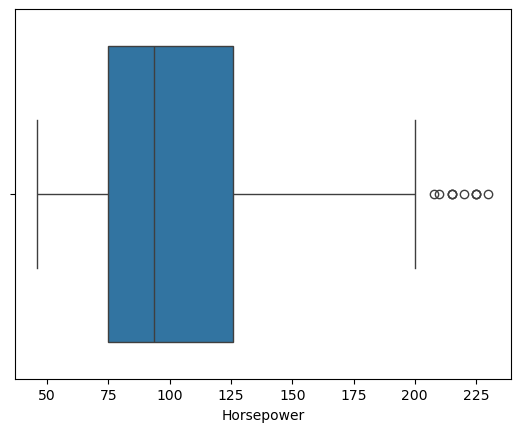

In [115]:
# looking at HP box plot
sns.boxplot(x=data['Horsepower'])

In [116]:
# imputing the values with median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [117]:
# category distribution
data["Cylinders"].value_counts() / len(data)
data['Origin'].value_counts()

Origin
1    249
3     79
2     70
Name: count, dtype: int64

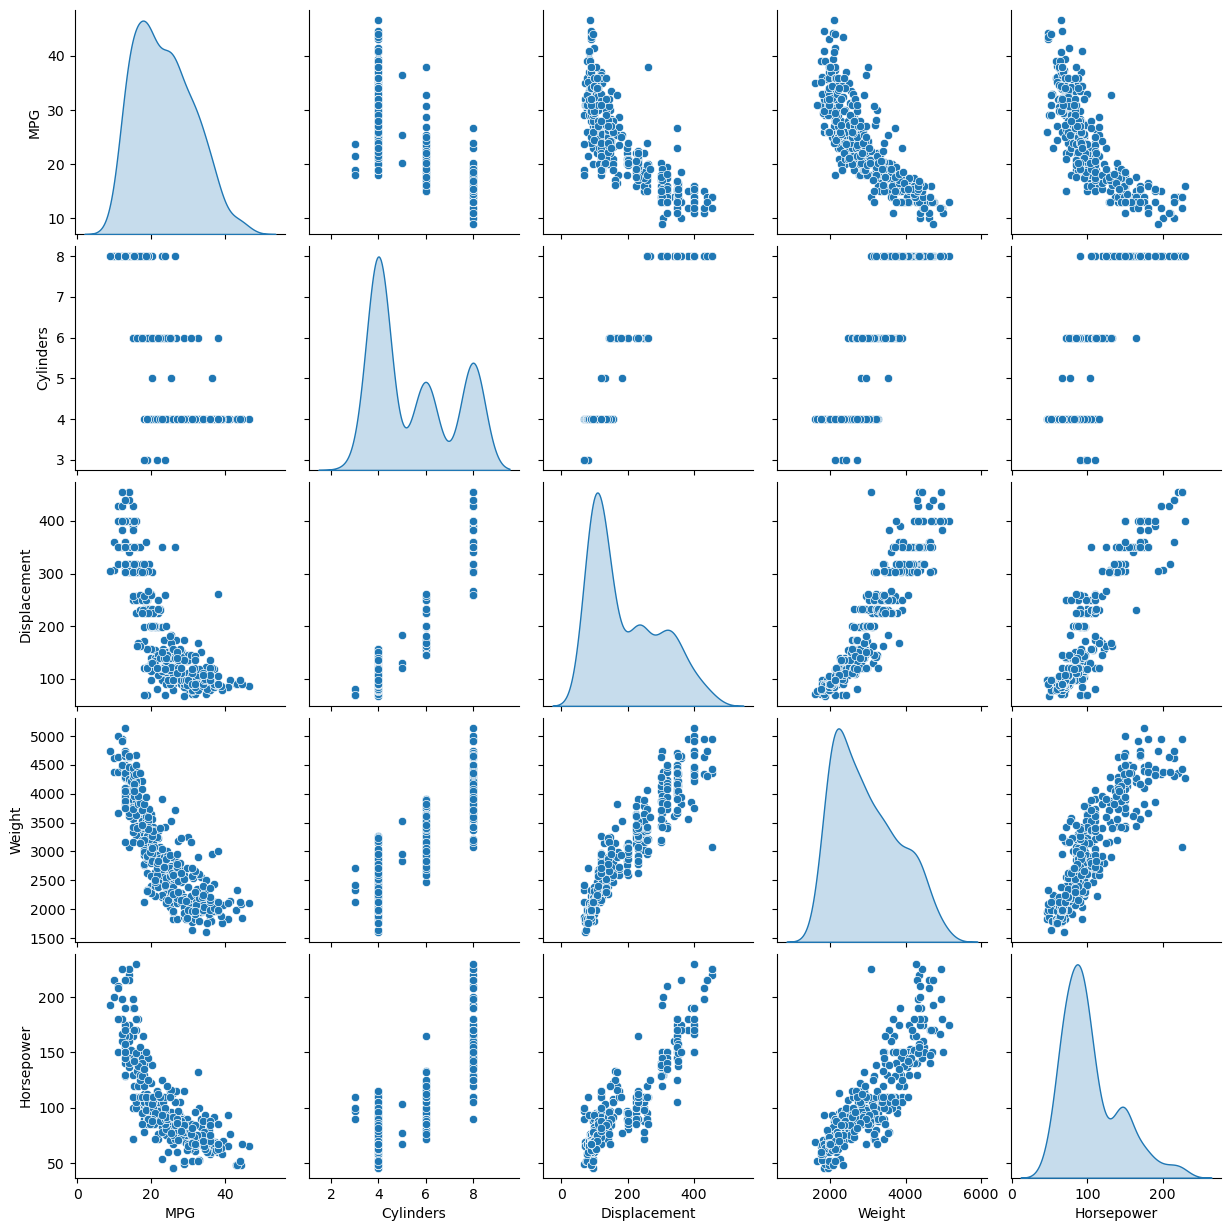

In [118]:
# pairplots to get an intuition of potential correlations
sns.pairplot(
    data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], 
    diag_kind="kde"
)

In [119]:
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [120]:
# checking for cylinder category distribution in training set
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

Cylinders
4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: count, dtype: float64

In [121]:
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

Cylinders
4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: count, dtype: float64

In [122]:
# converting integer classes to countries in Origin 
strat_train_set['Origin'] = strat_train_set['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
strat_train_set.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
260,18.6,6,225.0,110.0,3620.0,18.7,78,India
145,32.0,4,83.0,61.0,2003.0,19.0,74,Germany
337,32.4,4,107.0,72.0,2290.0,17.0,80,Germany
195,29.0,4,85.0,52.0,2035.0,22.2,76,India
265,17.5,8,318.0,140.0,4080.0,13.7,78,India
53,31.0,4,71.0,65.0,1773.0,19.0,71,Germany
239,30.0,4,97.0,67.0,1985.0,16.4,77,Germany
365,20.2,6,200.0,88.0,3060.0,17.1,81,India
70,13.0,8,400.0,190.0,4422.0,12.5,72,India
139,14.0,8,302.0,140.0,4638.0,16.0,74,India


In [123]:
# one hot encoding
train_set = pd.get_dummies(strat_train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,True,False,False
151,31.0,4,79.0,67.0,2000.0,16.0,74,False,False,True
388,26.0,4,156.0,92.0,2585.0,14.5,82,False,True,False
48,18.0,6,250.0,88.0,3139.0,14.5,71,False,True,False
114,26.0,4,98.0,90.0,2265.0,15.5,73,False,False,True


In [124]:
# testing new variables by checking their correlation w.r.t. MPG
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [125]:
# Getting the column labels
data_labels = data.columns.tolist()
print(data_labels)

['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'displacement_on_power', 'weight_on_cylinder', 'acceleration_on_power', 'acceleration_on_cyl']


In [126]:
# onehotencoding the categorical values
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data)
data_cat_1hot   # returns a sparse matrix

data_cat_1hot.toarray()[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
# handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data)

SimpleImputer(strategy='median')

In [128]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

##custom class inheriting the BaseEstimator and TransformerMixin
class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data.values)
data_tr_extra_attrs[0]

array([1.80000000e+01, 8.00000000e+00, 3.07000000e+02, 1.30000000e+02,
       3.50400000e+03, 1.20000000e+01, 7.00000000e+01, 1.00000000e+00,
       2.36153846e+00, 4.38000000e+02, 9.23076923e-02, 1.50000000e+00,
       1.14136808e+01, 1.94666667e+02])

In [100]:
# Pipeline
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

In [101]:
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [102]:
# preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})    
    return df

In [103]:
# from raw data to processed data in 2 steps
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

ct = ColumnTransformer(
    [("norm1", Normalizer(norm='l1'), [0, 1]),
     ("norm2", Normalizer(norm='l1'), slice(2, 4))])

preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  0.        ,
         1.        ,  0.        ]])

In [104]:
prepared_data[0]

array([-0.7064387 ,  1.49819126,  1.0906037 ,  0.67311762,  0.63086987,
       -1.29549834, -1.62742629,  1.14754788, -1.41012196, -1.02693601,
       -1.42777381, -1.30087953,  0.42342354,  0.        ,  1.        ,
        0.        ])

In [105]:
# Getting the column labels
data_labels = data['MPG']
print(data_labels)

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 398, dtype: float64


In [106]:
# model creation
from sklearn.linear_model import LinearRegression

print(data.head())
lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data['MPG'])

    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year Origin  displacement_on_power  weight_on_cylinder  \
0          70  India               2.361538             438.000   
1          70  India               2.121212             461.625   
2          70  India               2.120000             429.500   
3          70  India               2.026667             429.125   
4          70  India               2.157143             431.125   

   acceleration_on_power  acceleration_on_cyl  
0               0.092308               1.5000  
1               0.069697               1.4375  
2               0.073333        

LinearRegression()

In [107]:
# testing the predictions with first 5 rows
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]
sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

ValueError: X has 14 features, but LinearRegression is expecting 16 features as input.